In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import datetime
from fbprophet import Prophet
from sklearn.metrics import r2_score
plt.style.use("ggplot")

<ipython-input-1-69e2abb12f08>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
dt0 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dt1 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dt2 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
dt0.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678


In [4]:
dt1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,819,825,831,836,842,847,851,853,856,859


In [5]:
dt2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676


In [6]:
# As we see in above output lotitude and logitude are not important features . lets drop them from each dataframe
dt0.drop(columns=['Lat','Long'],axis=1,inplace=True)
dt0.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734
1,NaN,Albania,0,0,0,0,0,0,0,0,...,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842
4,NaN,Angola,0,0,0,0,0,0,0,0,...,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678


In [7]:
dt1.drop(columns=['Lat','Long'],axis=1,inplace=True)
dt1.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934
1,NaN,Albania,0,0,0,0,0,0,0,0,...,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,0,0,0,0,0,0,0,0,...,819,825,831,836,842,847,851,853,856,859


In [8]:
dt2.drop(columns=['Lat','Long'],axis=1,inplace=True)
dt2.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401
1,NaN,Albania,0,0,0,0,0,0,0,0,...,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650
4,NaN,Angola,0,0,0,0,0,0,0,0,...,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676


In [9]:
# Preparing data for exploratory data analysis 
dt0.set_index('Country/Region',inplace=True)
dt0_t = dt0.transpose()
dt0_t.to_csv('Daily_Covid19_conf_cases.csv') # for every latest data we make this CSV
dt_conf_cases = pd.read_csv('Daily_Covid19_conf_cases.csv')
dt_conf_cases.head(2)

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dt_conf_cases.rename(columns={'Unnamed: 0':'Country/Region'},inplace=True)
dt_conf_cases.head(2)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dt1.set_index('Country/Region',inplace=True) 
dt1_t = dt1.transpose()
dt1_t.to_csv('Daily_Covid19_conf_deaths.csv')
dt_conf_deaths = pd.read_csv('Daily_Covid19_conf_deaths.csv')
dt_conf_deaths.head(2)

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dt_conf_deaths.rename(columns={'Unnamed: 0':'Country/Region'},inplace=True)
dt_conf_deaths.head(2)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dt2.set_index('Country/Region',inplace=True)
dt2_t = dt2.transpose()
dt2_t.to_csv('Daily_Covid19_Recover_Cases.csv')
dt_conf_recovered = pd.read_csv('Daily_Covid19_Recover_Cases.csv')
dt_conf_recovered.tail(2)

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
515,6/19/21,63875.0,129910.0,94336.0,13650.0,31589.0,1221.0,3868105.0,215999.0,121,...,0.0,320347.0,101311.0,3.0,239480.0,5054.0,306240.0,3855.0,105960.0,37167.0
516,6/20/21,64401.0,129918.0,94571.0,13650.0,31676.0,1221.0,3890213.0,216049.0,121,...,0.0,323494.0,101692.0,3.0,240933.0,5229.0,306240.0,3953.0,108960.0,37184.0


In [14]:
dt_conf_recovered.rename(columns={'Unnamed: 0':'Country/Region'},inplace=True)
dt_conf_recovered.tail(2)

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
515,6/19/21,63875.0,129910.0,94336.0,13650.0,31589.0,1221.0,3868105.0,215999.0,121,...,0.0,320347.0,101311.0,3.0,239480.0,5054.0,306240.0,3855.0,105960.0,37167.0
516,6/20/21,64401.0,129918.0,94571.0,13650.0,31676.0,1221.0,3890213.0,216049.0,121,...,0.0,323494.0,101692.0,3.0,240933.0,5229.0,306240.0,3953.0,108960.0,37184.0


## Basic Checks & EDA (Exploratory Data Analytics)

In [15]:
dt_conf_cases.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [16]:
dt_conf_cases.dtypes

Country/Region         object
Afghanistan           float64
Albania               float64
Algeria               float64
Andorra               float64
                       ...   
Vietnam               float64
West Bank and Gaza    float64
Yemen                 float64
Zambia                float64
Zimbabwe              float64
Length: 279, dtype: object

In [17]:
dt_conf_cases.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,...,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,36618.517442,43957.329457,59288.982558,5199.939922,10775.593023,332.639535,1.150447e+06,91960.687984,217462.343023,115762.829457,...,1.706493e+06,47066.034884,47417.408915,0.957364,80212.077519,1615.160853,94289.875969,2155.310078,30747.930233,14264.949612
std,23739.360387,50788.173925,47982.598185,5070.477270,11348.730114,454.180125,1.200269e+06,82022.211506,239559.399589,121909.465513,...,1.801546e+06,87435.841374,36763.557527,1.405303,76246.769809,2123.014526,108524.592063,2023.329218,36875.378575,15515.242611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14311.500000,1116.250000,9233.750000,764.000000,83.250000,25.000000,1.601525e+04,8864.250000,16677.500000,5181.750000,...,2.548012e+05,819.750000,3526.500000,0.000000,1436.750000,328.000000,446.750000,303.250000,1057.000000,167.750000
50%,39454.000000,14489.000000,52334.500000,2370.000000,5627.500000,107.000000,8.170980e+05,52880.000000,49357.500000,40859.500000,...,5.228420e+05,2166.000000,59144.500000,0.000000,79456.500000,1097.500000,42194.500000,2044.000000,15129.500000,7906.500000
75%,55426.250000,90040.750000,110112.500000,10400.000000,20269.250000,390.500000,2.010133e+06,168714.500000,429571.750000,231696.750000,...,4.002441e+06,47397.500000,79312.250000,1.000000,131935.750000,2140.500000,165701.250000,2134.500000,66868.750000,34909.250000
max,98734.000000,132490.000000,135821.000000,13842.000000,37678.000000,1263.000000,4.268789e+06,224227.000000,649576.000000,335493.000000,...,4.630040e+06,354865.000000,106025.000000,4.000000,260740.000000,13258.000000,312673.000000,6885.000000,129033.000000,41779.000000


In [18]:
dt_conf_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 279 entries, Country/Region to Zimbabwe
dtypes: float64(191), object(88)
memory usage: 1.1+ MB


In [19]:
dt_conf_deaths.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dt_conf_deaths.dtypes

Country/Region         object
Afghanistan           float64
Albania               float64
Algeria               float64
Andorra               float64
                       ...   
Vietnam               float64
West Bank and Gaza    float64
Yemen                 float64
Zambia                float64
Zimbabwe              float64
Length: 279, dtype: object

In [21]:
dt_conf_deaths.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000,516.000000
mean,1440.655039,833.151163,1768.403101,67.624031,260.430233,9.656977,27032.957364,1684.306202,3706.472868,1578.408915,...,61406.521318,616.532946,359.424419,0.118217,790.701550,22.176357,1003.689922,517.53876,458.091085,528.996124
std,1037.190683,899.867602,1193.639839,39.360398,254.558176,12.797625,26759.704336,1549.888943,4025.029127,1708.960480,...,44341.852109,1238.970174,284.008184,0.323178,819.749007,18.164243,1220.149877,400.80800,481.223991,638.712282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249.250000,33.000000,644.000000,51.000000,4.000000,3.000000,526.000000,125.250000,668.000000,60.250000,...,37346.500000,22.000000,14.000000,0.000000,14.000000,0.000000,3.000000,74.00000,7.000000,4.000000
50%,1468.500000,401.500000,1768.000000,53.000000,203.500000,3.000000,21647.500000,987.000000,820.000000,599.000000,...,42407.000000,48.500000,487.000000,0.000000,661.500000,35.000000,344.000000,592.50000,334.500000,228.500000
75%,2420.250000,1520.500000,2930.500000,106.000000,487.750000,9.000000,49912.750000,3135.750000,8146.000000,3170.750000,...,115718.500000,524.750000,622.000000,0.000000,1261.750000,35.000000,1912.000000,616.00000,918.250000,1371.250000
max,3934.000000,2454.000000,3631.000000,127.000000,859.000000,42.000000,89043.000000,4498.000000,10680.000000,4962.000000,...,127976.000000,5271.000000,718.000000,1.000000,2958.000000,66.000000,3551.000000,1355.00000,1644.000000,1672.000000


In [22]:
dt_conf_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 279 entries, Country/Region to Zimbabwe
dtypes: float64(191), object(88)
memory usage: 1.1+ MB


In [23]:
dt_conf_recovered.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
dt_conf_recovered.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Austria,Azerbaijan,...,United Kingdom.11,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,...,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,28663.315891,32556.513566,40667.422481,4769.267442,8405.833333,264.887597,1.004562e+06,81056.312016,199546.067829,104383.406977,...,7.974806,39877.910853,44970.271318,0.616279,73170.635659,1105.707364,84630.184109,1137.649225,28588.511628,12415.191860
std,20741.044370,42842.165575,33213.919846,4936.221369,9975.480965,386.276322,1.080441e+06,77576.343694,229009.879110,115365.873876,...,35.925237,75835.427512,36202.555565,0.961414,71291.430450,1009.795268,102191.231868,991.444438,34902.794143,14281.974771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1292.000000,855.500000,5517.250000,690.000000,18.000000,19.000000,4.788000e+03,3312.000000,15476.750000,3276.500000,...,0.000000,681.500000,2769.250000,0.000000,302.000000,279.000000,368.000000,12.500000,779.000000,28.750000
50%,32928.000000,8895.000000,36717.500000,1615.000000,2594.500000,96.000000,6.546445e+05,44821.000000,39424.000000,38650.000000,...,0.000000,1870.000000,55845.500000,0.000000,70275.500000,1022.500000,35390.500000,1325.000000,14309.500000,6432.000000
75%,48306.750000,54582.250000,75484.000000,9794.000000,18729.000000,197.500000,1.808235e+06,160712.000000,407472.750000,226175.500000,...,0.000000,41561.000000,77739.500000,1.000000,123921.500000,1528.250000,154885.750000,1428.500000,60317.250000,29593.000000
max,64401.000000,129918.000000,94571.000000,13650.000000,31676.000000,1221.000000,3.890213e+06,216049.000000,636125.000000,329550.000000,...,344.000000,323494.000000,101692.000000,3.000000,240933.000000,5229.000000,306240.000000,3953.000000,108960.000000,37184.000000


In [25]:
dt_conf_recovered.dtypes

Country/Region         object
Afghanistan           float64
Albania               float64
Algeria               float64
Andorra               float64
                       ...   
Vietnam               float64
West Bank and Gaza    float64
Yemen                 float64
Zambia                float64
Zimbabwe              float64
Length: 264, dtype: object

In [26]:
dt_conf_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Columns: 264 entries, Country/Region to Zimbabwe
dtypes: float64(192), object(72)
memory usage: 1.0+ MB


### Data Extraction
lets extract the required data for visuallization and future forecasting

In [27]:
count = []
for i in range(1,len(dt_conf_cases)):
    count.append(sum(pd.to_numeric(dt_conf_cases.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = dt_conf_cases["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")
df.head()

,Cases
Date,
1/22/20,557.0
1/23/20,655.0
1/24/20,941.0
1/25/20,1433.0
1/26/20,2118.0


In [28]:
count = []
for i in range(1,len(dt_conf_deaths)):
    count.append(sum(pd.to_numeric(dt_conf_deaths.iloc[i,1:].values)))

df["Deaths"] = count
df.tail()

,Cases,Deaths
Date,,
6/16/21,177042260.0,3833074.0
6/17/21,177434597.0,3842335.0
6/18/21,177840377.0,3851539.0
6/19/21,178187719.0,3859605.0
6/20/21,178487909.0,3866158.0


In [29]:
count = []
for i in range(1,len(dt_conf_recovered)):
    count.append(sum(pd.to_numeric(dt_conf_recovered.iloc[i,1:].values)))

df["Recovered"] = count
df.tail()

,Cases,Deaths,Recovered
Date,,,
6/16/21,177042260.0,3833074.0,115149802.0
6/17/21,177434597.0,3842335.0,115530280.0
6/18/21,177840377.0,3851539.0,115849843.0
6/19/21,178187719.0,3859605.0,116181693.0
6/20/21,178487909.0,3866158.0,116446787.0


In [30]:
df.dtypes

Cases        float64
Deaths       float64
Recovered    float64
dtype: object

<AxesSubplot:xlabel='Date'>

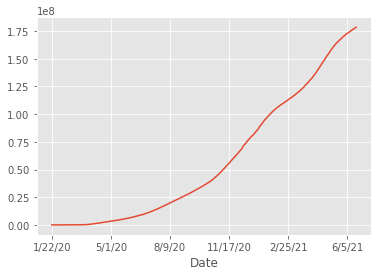

In [31]:
df.Cases.plot()

<AxesSubplot:xlabel='Date'>

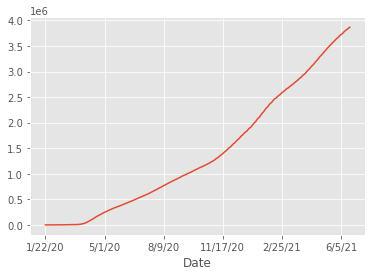

In [32]:
df.Deaths.plot()

<AxesSubplot:xlabel='Date'>

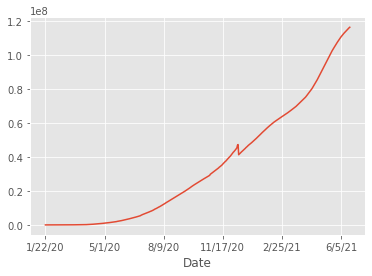

In [33]:
df.Recovered.plot()

As we see all above graphs that indicates trend in data and not stationary as well cheacking with adfuller test for stationarity.

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [35]:
# Stationarity test for Total cases data 
X = df['Cases'].values
result = adfuller(X)
print("Adfuller test for Cases data Stationarity -:\n")
print('ADF Statistic: %f'% result[0])
print('p-values: %f' % result[1])
print('Critical Values:')
for key, Cases in result[4].items():
    print('\t%s: %.3f' % (key, Cases))
    
if result[0]< result[4]["5%"]:
    print("Reject Ho - TIme Series is Stationary")
else:
    print("Failed to Reject Ho - TIme Series is Non-Stationary")

Adfuller test for Cases data Stationarity -:

ADF Statistic: 0.141707
p-values: 0.968796
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - TIme Series is Non-Stationary


In [36]:
X = df['Deaths'].values
result = adfuller(X)
print("Adfuller test for Cases data Stationarity -:\n")
print('ADF Statistic: %f'% result[0])
print('p-values: %f' % result[1])
print('Critical Values:')
for key, Cases in result[4].items():
    print('\t%s: %.3f' % (key, Cases))
    
if result[0]< result[4]["5%"]:
    print("Reject Ho - TIme Series is Stationary")
else:
    print("Failed to Reject Ho - TIme Series is Non-Stationary")

Adfuller test for Cases data Stationarity -:

ADF Statistic: 1.573786
p-values: 0.997777
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - TIme Series is Non-Stationary


In [37]:
X = df['Recovered'].values
result = adfuller(X)
print("Adfuller test for Cases data Stationarity -:\n")
print('ADF Statistic: %f'% result[0])
print('p-values: %f' % result[1])
print('Critical Values:')
for key, Cases in result[4].items():
    print('\t%s: %.3f' % (key, Cases))
    
if result[0]< result[4]["5%"]:
    print("Reject Ho - TIme Series is Stationary")
else:
    print("Failed to Reject Ho - TIme Series is Non-Stationary")

Adfuller test for Cases data Stationarity -:

ADF Statistic: 9.798174
p-values: 1.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
Failed to Reject Ho - TIme Series is Non-Stationary


as we see the extracted data is not stationary , lets convert non statinary data stationary 
### Non-stationary to Stationary conversion 

In [38]:
df = df.diff(periods=1)
df = df[1:]
df.shift(1)
df.head()

,Cases,Deaths,Recovered
Date,,,
1/23/20,98.0,1.0,2.0
1/24/20,286.0,8.0,7.0
1/25/20,492.0,16.0,3.0
1/26/20,685.0,14.0,14.0
1/27/20,809.0,26.0,9.0


<AxesSubplot:xlabel='Date'>

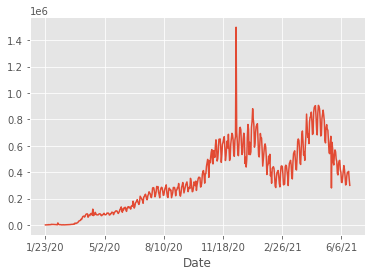

In [39]:
df.Cases.plot()

<AxesSubplot:xlabel='Date'>

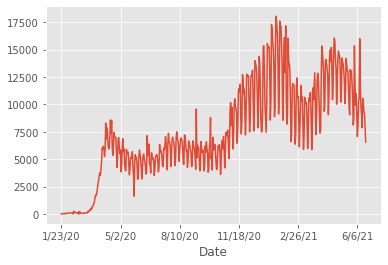

In [40]:
df.Deaths.plot()

<AxesSubplot:xlabel='Date'>

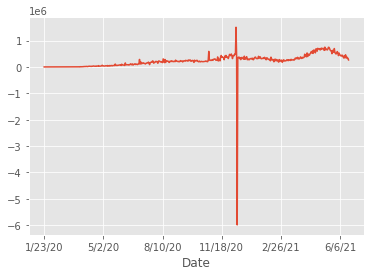

In [41]:
df.Recovered.plot()

As we see in above graphs the trend is removed and data is converted to Stationary 

In [42]:
df = df.to_csv("Covid19Main.csv")